# Task 1

## Question 1


*  For this particular question we are using the files in the folder combined itself



In [1]:
!unzip 'Combined.zip'

Archive:  Combined.zip
   creating: Combined/
   creating: Combined/Train/
   creating: Combined/Train/STANDING/
  inflating: Combined/Train/STANDING/Subject_23.csv  
  inflating: Combined/Train/STANDING/Subject_27.csv  
  inflating: Combined/Train/STANDING/Subject_15.csv  
  inflating: Combined/Train/STANDING/Subject_3.csv  
  inflating: Combined/Train/STANDING/Subject_7.csv  
  inflating: Combined/Train/STANDING/Subject_19.csv  
  inflating: Combined/Train/STANDING/Subject_25.csv  
  inflating: Combined/Train/STANDING/Subject_30.csv  
  inflating: Combined/Train/STANDING/Subject_16.csv  
  inflating: Combined/Train/STANDING/Subject_8.csv  
  inflating: Combined/Train/STANDING/Subject_17.csv  
  inflating: Combined/Train/STANDING/Subject_1.csv  
  inflating: Combined/Train/STANDING/Subject_6.csv  
  inflating: Combined/Train/STANDING/Subject_21.csv  
  inflating: Combined/Train/STANDING/Subject_28.csv  
  inflating: Combined/Train/STANDING/Subject_22.csv  
  inflating: Combined/Train/

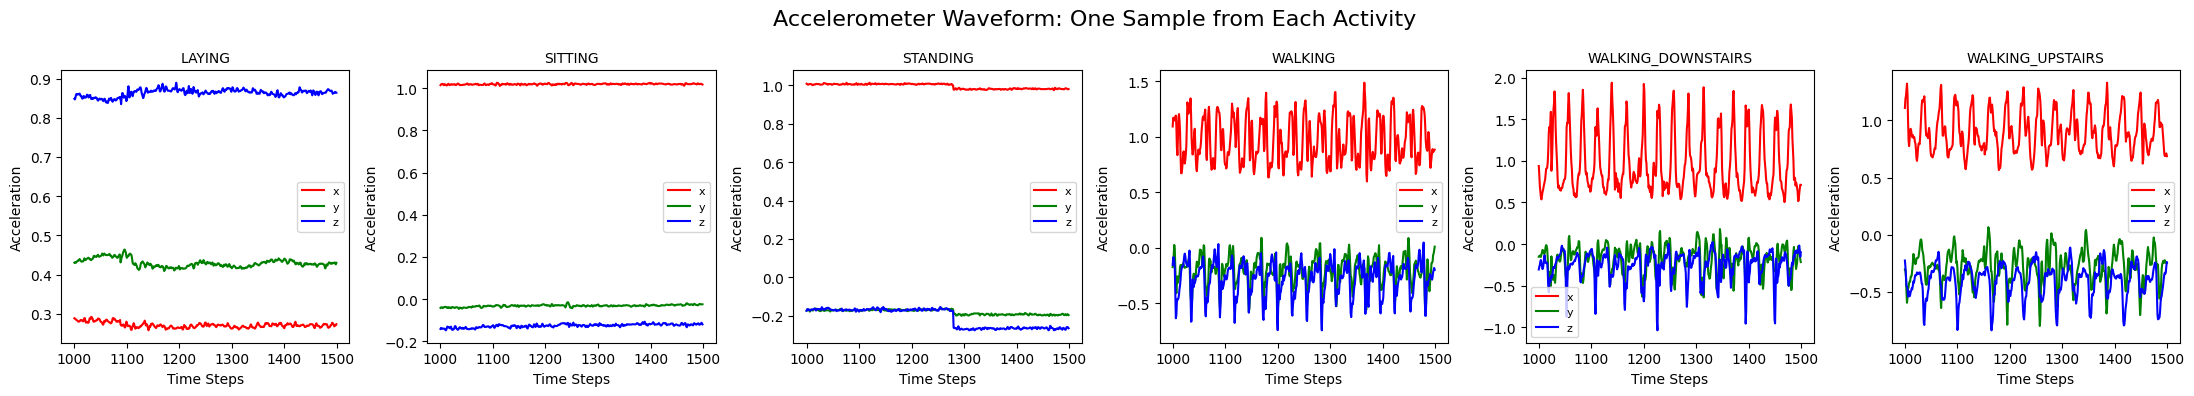

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
train_data_path = "Combined/Train"

# List of activity classes
activity_labels = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

# Acceleration axes: x, y, z
axis_labels = ['x', 'y', 'z']
axis_colors = ['red', 'green', 'blue']

# Offset and window
offset = 1000     # skip noisy startup data
window_size = 500

# Create subplots: 1 row, 6 columns
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(22, 4))
fig.suptitle('Accelerometer Waveform: One Sample from Each Activity', fontsize=16)

for i, activity in enumerate(activity_labels):
    activity_folder = os.path.join(train_data_path, activity)
    files = sorted(os.listdir(activity_folder))

    file_path = os.path.join(activity_folder, files[4]) # Randomly picked the 4th file
    df = pd.read_csv(file_path)

    trimmed_df = df.iloc[offset : offset + window_size]

    # Plot each axis (x/y/z)
    for j in range(3):
        axs[i].plot(trimmed_df.iloc[:, j], label=axis_labels[j], color=axis_colors[j])

    axs[i].set_title(activity, fontsize=10)
    axs[i].set_xlabel("Time Steps")
    axs[i].set_ylabel("Acceleration")
    axs[i].legend(fontsize=8)

plt.tight_layout()
plt.show()


**Observations for Q1**

Laying: Acceleration is mostly stable. X-axis is near 0, suggesting the phone lies flat. Y and Z axes show consistent values, indicating a lack of motion.

Sitting: X-axis acceleration is close to 1, likely due to the phone's upright position. All axes are stable, showing no major movement.

Standing: X and Z axis show a brief variation during the standing motion, then stabilize. This pattern marks a transition from motion to stillness.

Dynamic Activities (Walking, Upstairs, Downstairs): All axes exhibit frequent and irregular fluctuations. These variations reflect continuous movement and change in orientation.


**Verdict:**
The ML model maybe able to differentiate dynamic and static situations, and identify activities in dynamic situations. However, it may struggle to accurately distinguish activities within static situations due to very similar waveforms (especially standing and sitting).

## Question 2



In [3]:
train_data_path = "Combined/Train"
activity_labels = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

static_avg = []
dynamic_avg = []

# Defined static and dynamic categories
static_activities = ["LAYING", "SITTING", "STANDING"]
dynamic_activities = ["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

print("Static Activities: ")
flag=1

for activity in activity_labels:
    folder = os.path.join(train_data_path, activity)
    file = sorted(os.listdir(folder))[4]  # Randomly picked a file
    df = pd.read_csv(os.path.join(folder, file))
    df = df.iloc[1000:1700]

    # Calculate acceleration magnitude
    acc_x, acc_y, acc_z = df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]
    acc_mag = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
    mean_mag = acc_mag.mean()

    if activity in static_activities:
        static_avg.append(mean_mag)
        print(f"{activity}: {mean_mag}")
    else:
        dynamic_avg.append(mean_mag)
        if flag:
          print()
          print("Dynamic Activities: ")
          flag=0
        print(f"{activity}: {mean_mag}")

# Calculated threshold
threshold = (np.mean(static_avg) + np.mean(dynamic_avg)) / 2
print()
print("Threshold:", threshold)


Static Activities: 
LAYING: 1.0016666597034385
SITTING: 1.0275121917931556
STANDING: 1.0334832468852102

Dynamic Activities: 
WALKING: 1.046390832595908
WALKING_DOWNSTAIRS: 1.0409004402620579
WALKING_UPSTAIRS: 1.043104664406274

Threshold: 1.0321763392743408


Since there's a clear separation in average acceleration magnitude between static and dynamic activities, a simple threshold-based rule is sufficient.  
**We do not require a machine learning model** for this binary classification.

## Question 3

Let's first clearly take out the training and test daataset using the provided script

In [4]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


## Question 3.1

PCA on Total Acceleration

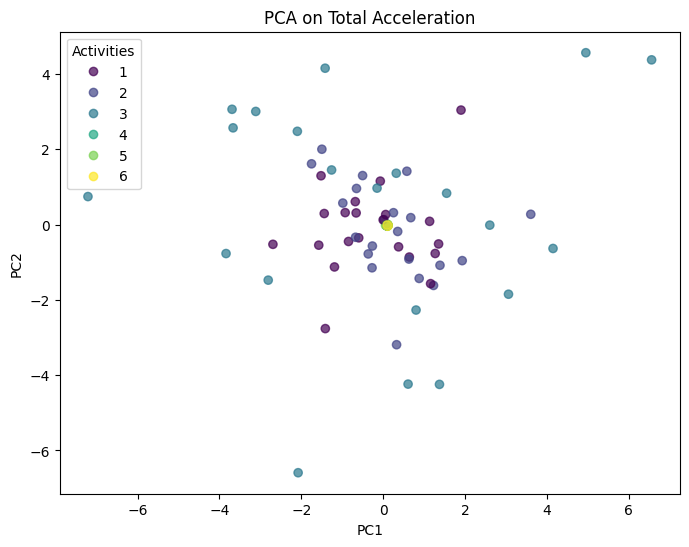

In [5]:
from sklearn.decomposition import PCA

# Compute total acceleration
total_acc = np.sqrt(X_train[:, :, 0]**2 + X_train[:, :, 1]**2 + X_train[:, :, 2]**2)

# PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca_total = pca.fit_transform(total_acc)

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_total[:,0], X_pca_total[:,1], c=y_train, cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Activities")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Total Acceleration")
plt.show()


## Question 3.2

In [6]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 534.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.5 MB/s eta 0:00:00


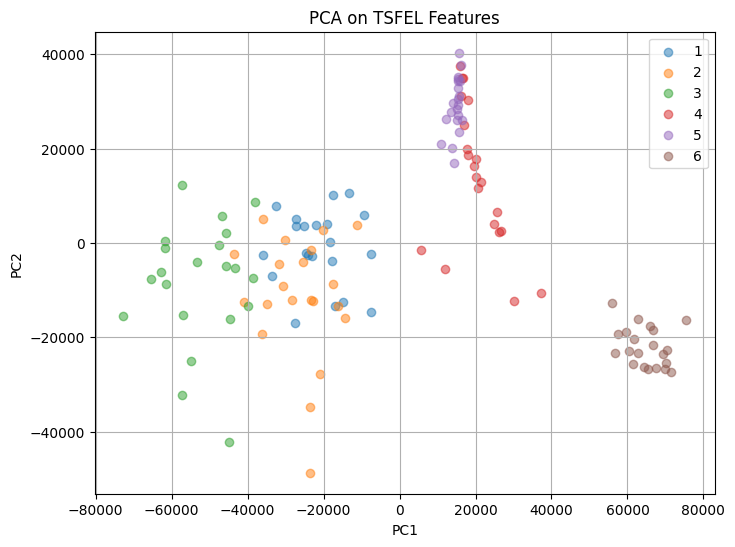

In [7]:
import tsfel

cfg = tsfel.get_features_by_domain()

# Extract features for each sample
X_tsfel = []
for i in range(X_train.shape[0]):
    df = pd.DataFrame(X_train[i], columns=["accx","accy","accz"])
    features = tsfel.time_series_features_extractor(cfg, df, fs=50, verbose=0)
    X_tsfel.append(features.values[0])

X_tsfel = np.array(X_tsfel)

# PCA on TSFEL features
pca = PCA(n_components=2)
X_pca_tsfel = pca.fit_transform(X_tsfel)

# Scatter plot
plt.figure(figsize=(8,6))
for label in np.unique(y_train):
    idx = y_train == label
    plt.scatter(X_pca_tsfel[idx,0], X_pca_tsfel[idx,1], alpha=0.5, label=label)
plt.legend()
plt.title("PCA on TSFEL Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


## Question 3.3



In [11]:
!unzip 'UCI HAR Dataset.zip'

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt  
  inflating: UCI HAR Dataset/test/Ine

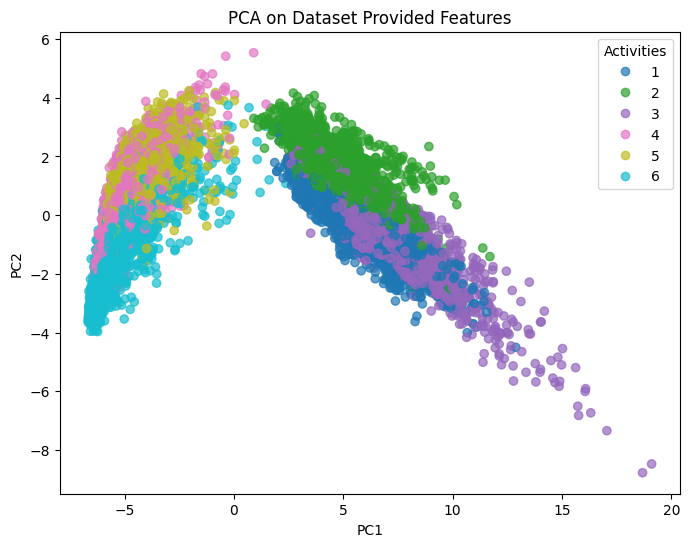

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data_path = "UCI HAR Dataset"

# Load training features and labels
X_train_dataset = pd.read_csv(data_path + "/train/X_train.txt", sep=r'\s+', header=None)
y_train_dataset = pd.read_csv(data_path + "/train/y_train.txt", sep=r'\s+', header=None)

# Load test features and labels
X_test_dataset = pd.read_csv(data_path + "/test/X_test.txt", sep=r'\s+', header=None)
y_test_dataset = pd.read_csv(data_path + "/test/y_test.txt", sep=r'\s+', header=None)

# Combine train and test
X_dataset = pd.concat([X_train_dataset, X_test_dataset], axis=0)
y_dataset = pd.concat([y_train_dataset, y_test_dataset], axis=0).values.ravel()

# PCA to reduce 561 features to 2
pca = PCA(n_components=2)
X_pca_dataset = pca.fit_transform(X_dataset)

# Scatter plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_dataset[:,0], X_pca_dataset[:,1], c=y_dataset, cmap="tab10", alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Activities")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Dataset Provided Features")
plt.show()

**Comparing PCA Results**

PCA on TSFEL and UCI HAR features shows much clearer class separation than PCA on total acceleration. This suggests that decision tree models may perform better with these engineered features than with raw data. Total acceleration PCA indicates that dynamic activities are more spread out, while static activities cluster tightly. Overall, TSFEL and UCI HAR features appear particularly suitable for models like decision trees.

## Question 4

Max correlation: nan
Any NaNs: True


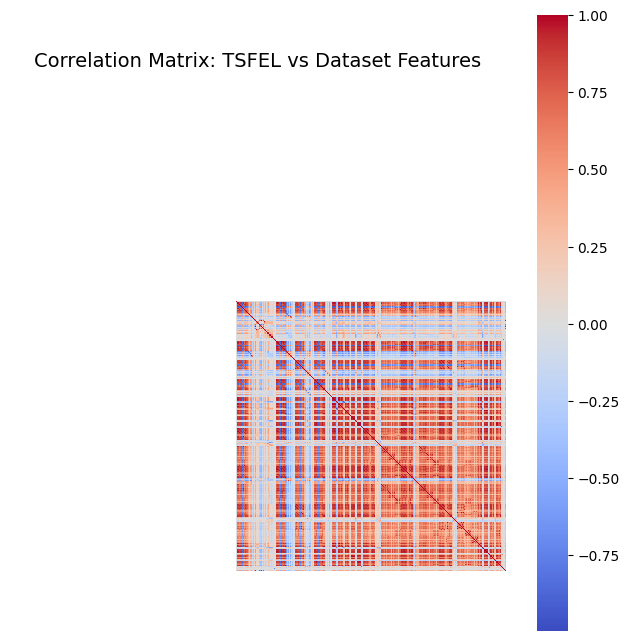

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_tsfel_scaled = scaler.fit_transform(X_tsfel)
X_dataset_scaled = scaler.fit_transform(X_dataset)
df_tsfel = pd.DataFrame(
    X_tsfel_scaled,
    columns=[f"TSFEL_{i}" for i in range(X_tsfel_scaled.shape[1])]
)

df_dataset = pd.DataFrame(
    X_dataset_scaled,
    columns=[f"Dataset_{i}" for i in range(X_dataset_scaled.shape[1])]
)

df_combined = pd.concat([df_tsfel, df_dataset], axis=1)
corr_matrix_combined = np.corrcoef(df_combined, rowvar=False) #obtaining correlation matrix by using inbuilt

print("Max correlation:", np.max(corr_matrix_combined)) #checking that all the values are capped to 1
print("Any NaNs:", np.isnan(corr_matrix_combined).any()) #checking if there is nan value which should not be there

corr_matrix = pd.DataFrame(corr_matrix_combined, columns=df_combined.columns, index=df_combined.columns)

plt.figure(figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    xticklabels=False,
    yticklabels=False,
    square=True
)
plt.title("Correlation Matrix: TSFEL vs Dataset Features", fontsize=14)
plt.show()



In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix_combined = df_combined.corr()

# Identify highly correlated features (threshold > 0.9)
threshold = 0.9
# Filter out self-correlations and only keep the upper triangle
high_corr_pairs = corr_matrix_combined.where(np.triu(np.ones(corr_matrix_combined.shape), k=1).astype(bool)).stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs.abs() > threshold].sort_values(ascending=False)

print("Highly correlated feature pairs (>|0.9|):")
if high_corr_pairs.empty:
    print("No highly correlated features found above the threshold.")
else:
    flag=0
    for (feat1, feat2), corr_value in high_corr_pairs.items():
        if flag<=8:
          flag+=1
          continue
        print(f"{feat1} - {feat2}: {corr_value}")

Highly correlated feature pairs (>|0.9|):
Dataset_502 - Dataset_507: 1.0
Dataset_515 - Dataset_520: 1.0
Dataset_203 - Dataset_216: 1.0
Dataset_205 - Dataset_218: 1.0
Dataset_202 - Dataset_215: 1.0
Dataset_200 - Dataset_218: 1.0
TSFEL_182 - TSFEL_184: 1.0
TSFEL_207 - TSFEL_233: 1.0
TSFEL_187 - TSFEL_191: 1.0
Dataset_541 - Dataset_546: 1.0
Dataset_252 - Dataset_257: 1.0
TSFEL_156 - TSFEL_159: 1.0
Dataset_239 - Dataset_244: 1.0
TSFEL_383 - TSFEL_392: 1.0
TSFEL_344 - TSFEL_346: 1.0
TSFEL_343 - TSFEL_347: 1.0
TSFEL_31 - TSFEL_35: 1.0
Dataset_226 - Dataset_231: 1.0
TSFEL_342 - TSFEL_348: 1.0
Dataset_210 - Dataset_223: 1.0
TSFEL_339 - TSFEL_341: 1.0
TSFEL_51 - TSFEL_77: 1.0
Dataset_528 - Dataset_533: 1.0
Dataset_205 - Dataset_213: 1.0
Dataset_206 - Dataset_219: 1.0
Dataset_207 - Dataset_220: 1.0
TSFEL_363 - TSFEL_389: 1.0
Dataset_200 - Dataset_213: 1.0
Dataset_201 - Dataset_214: 1.0
TSFEL_183 - TSFEL_185: 1.0
Dataset_204 - Dataset_217: 1.0
TSFEL_30 - TSFEL_36: 1.0
Dataset_209 - Dataset_222: 1